# Deutsch-Jozsa algorithm <a id="importing"></a>

The motivation of this exercise is to go with you through a standard quantum algorithm. It gives you an idea how quantum computers can outperform classical computers in certain tasks.

## 1. Introduction <a id='introduction'></a>

The Deutsch-Jozsa algorithm, first introduced in Reference [[1]](https://doi.org/10.1098%2Frspa.1992.0167), was the first example of a quantum algorithm that performs better than the best classical algorithm. It showed that there can be advantages to using a quantum computer as a computational tool for a specific problem.

### 1.1 Deutsch's Problem <a id='dproblem'> </a>

Consider the following situation: we are given an unknown function $f$, which takes as input one bit, $x=0$ or $1$, and returns either $0$ or $1$. Such a function has the property that it is either constant, $f(0)=f(1)$, or balanced $f(0)\neq f(1)$. For example

$$
f(0) = 0, \qquad f(1) = 1, $$

is balanced, while

$$
f(0) = 1, \qquad f(1) = 1, $$
is constant.

Classically, if we wish to find out if the function is constant or balanced, we need to check both possible input values, so we need to evaluate the function two times.

### 1.2 The Quantum Solution <a id='quantum-solution-1qbit'> </a>

In fact a quantum computer can do better, and check both input values in a single run. For this, we only need the function $f$ to be implemented as a quantum oracle $U_f$, which maps the state $\vert x\rangle \vert y\rangle $ to $ \vert x\rangle \vert y \oplus f(x)\rangle$, where $\oplus$ is addition modulo $2$. To see how the quantum computer solves the problem, consider the following circuit diagram


![title](deutsch_single_qbit.png)
After the initial Hadamard gates the state vector reads

$$ \vert \psi_1 \rangle = \left(\frac{\vert 0\rangle + \vert 1 \rangle}{2}\right)\otimes\left(\frac{\vert 0\rangle - \vert 1 \rangle}{2}\right) = \frac{1}{2}\sum_{x=0}^{1} \vert x\rangle \left(|0\rangle - |1 \rangle \right).$$

Because this state contains a superposition of states corresponding to all inputs $x$, by applying $U_f$ to $\vert\psi_1\rangle$ we evaluate $f$ on all input values simultaneously! Applying the oracle we obtain

$$\begin{align}\lvert \psi_2 \rangle &= \frac{1}{2}\sum_{x=0}^{1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle)\\&=\frac{1}{2}\sum_{x=0}^{1}(-1)^{f(x)}|x\rangle ( |0\rangle - |1\rangle )\end{align}$$

since for each $x,f(x)$ is either $0$ or $1$.

At this point the second single qubit register may be ignored. Apply a Hadamard gate to each qubit in the first register:

$$
\begin{align}
\lvert \psi_3 \rangle 
  &= \frac{1}{2}\sum_{x=0}^{1}(-1)^{f(x)}
  \left[ \sum_{y=0}^{1}(-1)^{x  y} 
  \vert y \rangle \right]\\ 
  &= \frac{1}{2}\sum_{y=0}^{1}
  \left[ \sum_{x=0}^{1}(-1)^{f(x)}(-1)^{x y} \right]
  \vert y \rangle
  \end{align}
$$

Now the information about the function $f$ is stored in the quantum state of the first qubit. Measure the first register. Notice that the probability of measuring the state $\vert 0 \rangle$, $P_{\vert 0 \rangle} = \lvert \frac{1}{2}\sum_{x=0}^{1}(-1)^{f(x)} \rvert^2$, which evaluates to $1$ if $f(x)$ is constant and $0$ if $f(x)$ is balanced. 

### 1.3 Why Does This Work? <a id='why-does-this-work1'> </a>

- **Constant Oracle**

When the oracle is *constant*, it has no effect (up to a global phase) on the input qubit, and the quantum states before and after querying the oracle are the same. Since the H-gate is its own inverse, in Step 4 we reverse Step 2 to obtain the initial quantum state of $|0\rangle$ in the first register.

- **Balanced Oracle**

After step 2, our input register is an equal superposition of all the states in the computational basis ($\vert0\rangle$ and $\vert1\rangle$). When the oracle is *balanced*, phase kickback adds a negative phase to exactly one of these states.


The quantum state after querying the oracle is orthogonal to the quantum state before querying the oracle. Thus, in Step 4, when applying the H-gates, we must end up with a quantum state that is orthogonal to $|0\rangle$. This means we should never measure the zero state. 

##  2. Creating Quantum Oracles <a id='creating-quantum-oracles'> </a>

Let's see how we can create a quantum oracle. 

For a constant function, it is simple:

$\qquad$ 1. if f(x) = 0, then apply the $I$ gate to the qubit in register 2.  
$\qquad$ 2. if f(x) = 1, then apply the $X$ gate to the qubit in register 2.

For a balanced function, there are also two different circuits we can create. The easiest way we can guarantee our circuit is balanced is by performing a CNOT for the qubit in register 1, with the qubit in register 2 as the target. For example:


![title](balanced1.png)


We can see which input states give which output in the table below:

| Input states that output 0 | Input States that output 1 |
|:--------------------------:|:--------------------------:|
|              0             |             1              |



We can change the results while keeping them balanced by wrapping the control in X-gates. See the circuit and its results table below:


![title](balanced2.png)


| Input states that output 0 | Input states that output 1 |
|:--------------------------:|:--------------------------:|
|             1              |             0              |

###  2.1 Worked example <a id='worked'></a>

Let's go through a specific example. Consider the identity function $f(0)=0$, $f(1)=1$. This function is balanced and the corresponding oracle is composed of a single CNOT gate (check for yourself!). After application of the oracle we have

$$\begin{align}\lvert \psi_2 \rangle &= \frac{1}{2}\sum_{x=0}^{1} \vert x\rangle (\vert x\rangle - \vert 1 \oplus x\rangle)\\&=\frac{1}{2}\left( \vert 00\rangle - \vert 01\rangle + \vert 11\rangle - \vert 10\rangle\right)\end{align}$$

The Hadamard on register one gives

$$\lvert \psi_3 \rangle =  \vert 1\rangle \otimes \left(\frac{\vert 0\rangle - \vert 1 \rangle}{2}\right) $$

Thus, measuring the first register always returns $\vert1\rangle$ indicating that the function is balanced.

## 3. Qiskit Implementation <a id='implementation'></a>

We now implement Deutsch's algorithm for the example of a one-bit function, with both constant and balanced oracles. First let's do our imports:

In [1]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

### 3.1 Constant Oracle <a id='const_oracle'></a>
Let's start by creating a constant oracle, in this case the input has no effect on the output so we just randomly set the output qubit to be 0 or 1:

$\color{red}{\text{Exercise 1: create a constant oracle!}}$

In [2]:

const_oracle = QuantumCircuit(2)

"Your code goes here"
output = np.random.randint(2)
if output == 1:
    const_oracle.x(1)

const_oracle.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

### 3.2 Balanced Oracle <a id='balanced_oracle'></a>

Next, we create a balanced oracle. As we saw in section 1b, we can create a balanced oracle by performing a CNOT with the input qubit as a control and the output bit as the target. We can vary the input states that give 0 or 1 by wrapping the control in X-gates.

$\color{red}{\text{Exercise 2: Create a balanced oracle}}$

In [3]:
balanced_oracle = QuantumCircuit(2)


# Place X-gate on first qbit at random
"Your code goes here"
x_wrap = np.random.randint(2)
if x_wrap == 1:
    balanced_oracle.x(0)

# Use barrier as divider, the barrier is only required for better visualization and has no direct effect on the quantum circuit itself
balanced_oracle.barrier()

# Controlled-NOT gate
"Place your new part here"
balanced_oracle.cx(0,1)

balanced_oracle.barrier()

# Place X-gate
"Place your new part here"
if x_wrap == 1:
    balanced_oracle.x(0)

balanced_oracle.draw()

┌───┐ ░       ░ ┌───┐
q_0: ┤ X ├─░───■───░─┤ X ├
     └───┘ ░ ┌─┴─┐ ░ └───┘
q_1: ──────░─┤ X ├─░──────
           ░ └───┘ ░

$\color{red}{\text{Exercise 3: Implement the algorithm}}$

In [4]:
dj_circuit = QuantumCircuit(2, 1) #2 qubits, 1 classical measurement

# Apply H-gates to the first register
"Your code is here"
dj_circuit.h(0)

# Use barrier as divider, the barrier is only required for better visualization and has no direct effect on the quantum circuit itself
dj_circuit.barrier()

# Put target qubit in state |->
"Your code is here"
dj_circuit.x(1)
dj_circuit.h(1)

# Use barrier as divider, the barrier is only required for better visualization and has no direct effect on the quantum circuit itself
dj_circuit.barrier()

dj_circuit.draw()



┌───┐ ░            ░ 
q_0: ┤ H ├─░────────────░─
     └───┘ ░ ┌───┐┌───┐ ░ 
q_1: ──────░─┤ X ├┤ H ├─░─
           ░ └───┘└───┘ ░ 
c: 1/═════════════════════

$\color{red}{\text{Exercise 4 : Add the on of the oracles to the dj_circuit randomly.}}$  $\color{red}{\text{Hint: you can add circuits with ".compose()"}}$ 

In [5]:
# Add oracle
"Your code goes here"
oracle = np.random.randint(2)
if oracle==0:
  dj_circuit = dj_circuit.compose(const_oracle)  
else:
  dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw()

┌───┐ ░            ░ ┌───┐ ░       ░ ┌───┐
q_0: ┤ H ├─░────────────░─┤ X ├─░───■───░─┤ X ├
     └───┘ ░ ┌───┐┌───┐ ░ └───┘ ░ ┌─┴─┐ ░ └───┘
q_1: ──────░─┤ X ├┤ H ├─░───────░─┤ X ├─░──────
           ░ └───┘└───┘ ░       ░ └───┘ ░      
c: 1/══════════════════════════════════════════

Finally, we perform an H-gate on the input qubit, and measure our input register:

$\color{red}{\text{Exercise 5 : Add the final gates and the measurement to your circuit.}}$

In [6]:

"Your code goes here"
# Repeat H-gates
dj_circuit.h(0)
dj_circuit.barrier()

# Measure
dj_circuit.measure(0, 0)

# Display circuit
dj_circuit.draw()

┌───┐ ░            ░ ┌───┐ ░       ░ ┌───┐┌───┐ ░ ┌─┐
q_0: ┤ H ├─░────────────░─┤ X ├─░───■───░─┤ X ├┤ H ├─░─┤M├
     └───┘ ░ ┌───┐┌───┐ ░ └───┘ ░ ┌─┴─┐ ░ └───┘└───┘ ░ └╥┘
q_1: ──────░─┤ X ├┤ H ├─░───────░─┤ X ├─░────────────░──╫─
           ░ └───┘└───┘ ░       ░ └───┘ ░            ░  ║ 
c: 1/═══════════════════════════════════════════════════╩═
                                                        0

Let's see the output. What do you conclude?

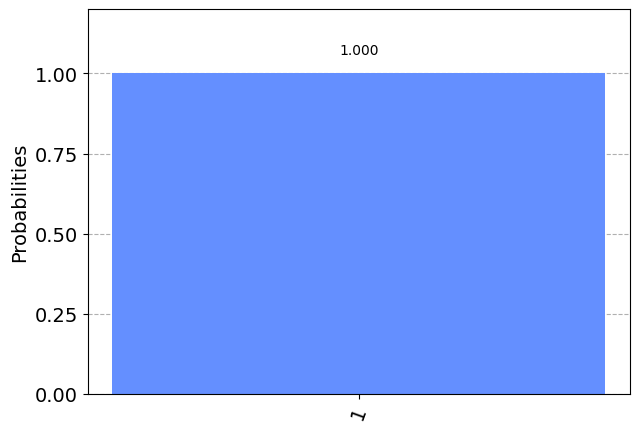

In [7]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

## 4. Experiment with Real Devices <a id='device'></a>

We can also run the circuit on the real device as shown below. Warning: It might take some time until it is your turn.

In [8]:
IBMQ.save_account("740cf9a029345b5770ad72af52ca4d1c51eb8afe78c6d95e17ecffd2e72033a693cf8563418f2143cf5d9780f497e3100577f0a400d882f5d4314ca68ce9fc37",overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research-2',group='max-planck-inst',project='codingchallenge')
backend = provider.get_backend('ibm_perth')

In [ ]:
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

In [ ]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

##  5. Generalization to $n$ qubits <a id='generalization'> </a>

###  5.1 Deutsch-Jozsa Problem <a id='djproblem'> </a>

The above procedure can be generalized to functions taking as inputs bit-strings of length $n$. The quantum computer is still able to determine whether the function in only a single shot! 

We are given a hidden Boolean function $f$, which takes as input a string of bits, and returns either $0$ or $1$, that is:

$$
f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1$$

The property of the given Boolean function is that it is guaranteed to either be balanced or constant. A constant function returns all $0$'s or all $1$'s for any input, while a balanced function returns $0$'s for exactly half of all inputs and $1$'s for the other half. Our task is to determine whether the given function is balanced or constant. 

###  5.2 The Classical Solution <a id='classical-solution'> </a>

Classically, in the best case, two queries to the oracle can determine if the hidden Boolean function, $f(x)$, is balanced: 
e.g. if we get both $f(0,0,0,...)\rightarrow 0$ and $f(1,0,0,...) \rightarrow 1$, then we know the function is balanced as we have obtained the two different outputs.  

In the worst case, if we continue to see the same output for each input we try, we will have to check exactly half of all possible inputs plus one in order to be certain that $f(x)$ is constant. Since the total number of possible inputs is $2^n$, this implies that we need $2^{n-1}+1$ trial inputs to be certain that $f(x)$ is constant in the worst case. For example, for a $4$-bit string, if we checked $8$ out of the $16$ possible combinations, getting all $0$'s, it is still possible that the $9^\textrm{th}$ input returns a $1$ and $f(x)$ is balanced. Probabilistically, this is a very unlikely event. In fact, if we get the same result continually in succession, we can express the probability that the function is constant as a function of $k$ inputs as:



$$ P_\textrm{constant}(k) = 1 - \frac{1}{2^{k-1}} \qquad \textrm{for } 1 < k \leq 2^{n-1}$$



Realistically, we could opt to truncate our classical algorithm early, say if we were over x% confident. But if we want to be 100% confident, we would need to check $2^{n-1}+1$ inputs.

###  5.3 Quantum Solution <a id='quantum-solution'> </a>

Below is the generic circuit for the Deutsch-Jozsa algorithm.

![title](deutsch_steps.png)

Now, let's go through the steps of the algorithm:

<ol>
   <li>
        Prepare two quantum registers. The first is an $n$-qubit register initialized to $|0\rangle$, and the second is a one-qubit register initialized to $|1\rangle$:
        

$$\vert \psi_0 \rangle = \vert0\rangle^{\otimes n} \vert 1\rangle$$


   </li>
    
   <li>
        Apply a Hadamard gate to each qubit:
        

$$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left(|0\rangle - |1 \rangle \right)$$


   </li>
   
   <li>
        Apply the quantum oracle $\vert x\rangle \vert y\rangle$ to $\vert x\rangle \vert y \oplus f(x)\rangle$ here: 

$$\begin{align}\lvert \psi_2 \rangle &= \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle)\\&=\frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle ( |0\rangle - |1\rangle )\end{align}$$

since for each $x,f(x)$ is either $0$ or $1$.
   </li>

   <li>
       At this point the second single qubit register may be ignored. Apply a Hadamard gate to each qubit in the first register:

$$
\begin{align}
\lvert \psi_3 \rangle 
  &= \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)}
  \left[ \sum_{y=0}^{2^n-1}(-1)^{x \cdot y} 
  \vert y \rangle \right]\\ 
  &= \frac{1}{2^n}\sum_{y=0}^{2^n-1}
  \left[ \sum_{x=0}^{2^n-1}(-1)^{f(x)}(-1)^{x \cdot y} \right]
  \vert y \rangle
  \end{align}
$$
       
where $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1}y_{n-1}$ is the sum of the bitwise product.
   </li>

   <li>
       Measure the first register. Notice that the probability of measuring $\vert 0 \rangle ^{\otimes n} = \lvert \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)} \rvert^2$, which evaluates to $1$ if $f(x)$ is constant and $0$ if $f(x)$ is balanced. 
   </li>

</ol>

###  5.4 Why Does This Work? <a id='why-does-this-work'> </a>

- **Constant Oracle**

When the oracle is *constant*, it has no effect (up to a global phase) on the input qubits, and the quantum states before and after querying the oracle are the same. Since the H-gate is its own inverse, in Step 4 we reverse Step 2 to obtain the initial quantum state of $|00\dots 0\rangle$ in the first register.

$$
H^{\otimes n}\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
= 
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
\quad \xrightarrow{\text{after } U_f} \quad
H^{\otimes n}\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
= 
\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
$$

- **Balanced Oracle**

After step 2, our input register is an equal superposition of all the states in the computational basis. When the oracle is *balanced*, phase kickback adds a negative phase to exactly half these states:

$$
U_f \tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} 
= 
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} -1 \\ 1 \\ -1 \\ \vdots \\ 1 \end{bmatrix}
$$


The quantum state after querying the oracle is orthogonal to the quantum state before querying the oracle. Thus, in Step 4, when applying the H-gates, we must end up with a quantum state that is orthogonal to $|00\dots 0\rangle$. This means we should never measure the all-zero state. 


$\color{red}{\text{Exercise 6: Construct a balanced oracle for 3 qubits}}$

Since we now have 3 qubits there are now more possibilities to have a balanced function. We can create the appropriate oracles by wrapping some input qubits in X-gates (analogous to the procedure above). Here, you are given a bitstring that tells you which qubits to wrap. For the bitsring "101" you should obtain the circuit displayed below:
![title](balancedn3.png)

In [10]:
# set the length of the n-bit input string. 
n = 3

In [11]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
"Your code goes here"
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider, the barrier is only required for better visualization and has no direct effect on the quantum circuit itself
balanced_oracle.barrier()

# Controlled-NOT gates
"Place your new part here"
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
"Your code goes here"
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

We have just created a balanced oracle for 3 qubits! All that's left to do is see if the Deutsch-Jozsa algorithm can solve it.



$\color{red}{\text{Exercise 7 : Prepare the initial states of the Deutsch algorithm!}}$

In [12]:
dj_circuit = QuantumCircuit(n+1, n) #n+1 qubits, n classicla measurement

# Apply H-gates to the first register
"Your code is here"
for qubit in range(n):
    dj_circuit.h(qubit)

# Use barrier as divider, the barrier is only required for better visualization and has no direct effect on the quantum circuit itself
dj_circuit.barrier()

# Put target qubit in state |->
"Your code is here"
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw()

┌───┐ ░           
q_0: ┤ H ├─░───────────
     ├───┤ ░           
q_1: ┤ H ├─░───────────
     ├───┤ ░           
q_2: ┤ H ├─░───────────
     └───┘ ░ ┌───┐┌───┐
q_3: ──────░─┤ X ├┤ H ├
           ░ └───┘└───┘
c: 3/══════════════════

Next, let's apply the oracle. Here we apply the `balanced_oracle` we created above:

$\color{red}{\text{Exercise 8 : Add the balanced_oracle to the dj_circuit.}}$  

In [13]:
# Add oracle
"Your code goes here"
dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw()

┌───┐ ░ ┌───┐      ░                 ░ ┌───┐
q_0: ┤ H ├─░─┤ X ├──────░───■─────────────░─┤ X ├
     ├───┤ ░ └───┘      ░   │             ░ └───┘
q_1: ┤ H ├─░────────────░───┼────■────────░──────
     ├───┤ ░ ┌───┐      ░   │    │        ░ ┌───┐
q_2: ┤ H ├─░─┤ X ├──────░───┼────┼────■───░─┤ X ├
     └───┘ ░ ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘ ░ └───┘└───┘└───┘ ░      
c: 3/════════════════════════════════════════════

Finally, we perform H-gates on the $n$-input qubits, and measure our input register:

$\color{red}{\text{Exercise 9 : Add the final gates and the measurement to your circuit.}}$

In [14]:
dj_circuit.barrier()
"Your code goes here"
# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

┌───┐ ░ ┌───┐      ░                 ░ ┌───┐ ░ ┌───┐ ░ ┌─┐      
q_0: ┤ H ├─░─┤ X ├──────░───■─────────────░─┤ X ├─░─┤ H ├─░─┤M├──────
     ├───┤ ░ └───┘      ░   │             ░ └───┘ ░ ├───┤ ░ └╥┘┌─┐   
q_1: ┤ H ├─░────────────░───┼────■────────░───────░─┤ H ├─░──╫─┤M├───
     ├───┤ ░ ┌───┐      ░   │    │        ░ ┌───┐ ░ ├───┤ ░  ║ └╥┘┌─┐
q_2: ┤ H ├─░─┤ X ├──────░───┼────┼────■───░─┤ X ├─░─┤ H ├─░──╫──╫─┤M├
     └───┘ ░ ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░ └───┘ ░  ║  ║ └╥┘
q_3: ──────░─┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░───────░───────░──╫──╫──╫─
           ░ └───┘└───┘ ░ └───┘└───┘└───┘ ░       ░       ░  ║  ║  ║ 
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2

Let's see the output:

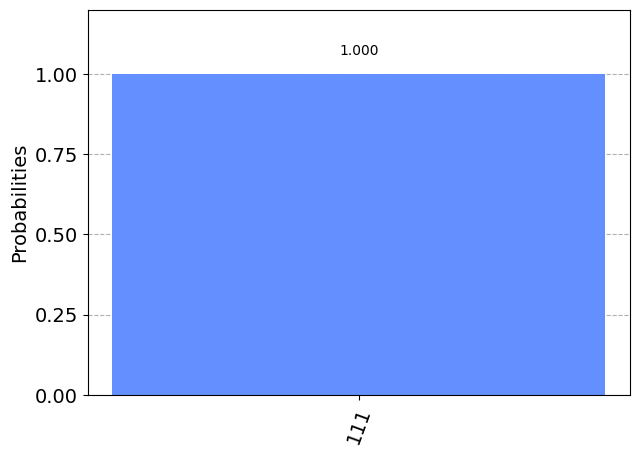

In [15]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

$\color{red}{\text{Bonus question: What would be the output when the result is neither constant nor balanced?}}$

## 6. References <a id='references'></a>

1. David Deutsch and Richard Jozsa (1992). "Rapid solutions of problems by quantum computation". Proceedings of the Royal Society of London A. 439: 553–558.  [doi:10.1098/rspa.1992.0167](https://doi.org/10.1098%2Frspa.1992.0167).
2. R. Cleve; A. Ekert; C. Macchiavello; M. Mosca (1998). "Quantum algorithms revisited". Proceedings of the Royal Society of London A. 454: 339–354. [doi:10.1098/rspa.1998.0164](https://doi.org/10.1098%2Frspa.1998.0164).

These notebooks are comprised of text and code taken from Qiskit's [documentation](https://qiskit.org/documentation/), [tutorials](https://qiskit.org/documentation/tutorials.html#quantum-circuits), [textbook](https://qiskit.org/textbook/preface.html), and previous challenges facilitated by Qiskit.